

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [1]:
#
# Import Libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

# Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [2]:
# Your code to read data

df = pd.read_csv('MRTSSM448USN.csv')

df
# Print first few rows of data

,DATE,MRTSSM448USN
0,1992-01-01,6938.0
1,1992-02-01,7524.0
2,1992-03-01,8475.0
3,1992-04-01,9401.0
4,1992-05-01,9558.0
...,...,...
379,2023-08-01,27143.0
380,2023-09-01,23840.0
381,2023-10-01,24438.0
382,2023-11-01,29150.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [3]:
# Set name of column as 'Sales'. Use - df.columns
df.columns = ['DATE', 'Sales']

Plot your data - Year vs Sales

<Axes: >

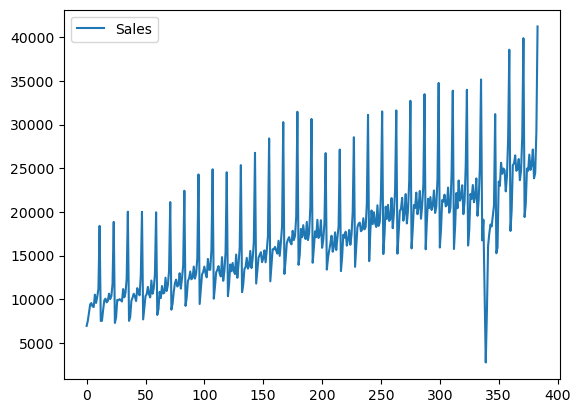

In [4]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
df.plot()

## Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [5]:
# Assign variable test size = 18
# Store length of data in variable length.
# store training size in varialable train_size (Remember training size = total size - test_size)
test_size = 18
length = len(df)
train_size = length - test_size

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [6]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
test_index = length - test_size

Next, we will separate train and test datasets.

In [7]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.
train = df['Sales'].iloc[:test_index]
test = df['Sales'].iloc[test_index:]

In [8]:
# Print the size of the train data
# Print the size of the test data
# Print the train data
# Print the test data
print(train.shape)
print(test.shape)
print(train.head())
print(test.head())


(366,)
(18,)
0    6938.0
1    7524.0
2    8475.0
3    9401.0
4    9558.0
Name: Sales, dtype: float64
366    24904.0
367    26049.0
368    23629.0
369    24787.0
370    28645.0
Name: Sales, dtype: float64


## In Neural Networks, we need to Scale Data between 0-1

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6938.  7524.  8475.  9401.  9558.  9182.  9103. 10513.  9573. 10254.
 11187. 18395.  7502.  7524.  8766.  9867. 10063.  9635.  9794. 10628.
 10013. 10346. 11760. 18851.  7280.  7902.  9921.  9869. 10009.  9893.
  9735. 11157. 10217. 10730. 12354. 20016.  7518.  7961.  9815. 10168.
 10620. 10301.  9784. 11264. 10710. 10439. 12751. 20002.  7684.  8991.
 10349. 10570. 11405. 10554. 10202. 12134. 10623. 11250. 12875. 19944.
  8194.  8835. 10840. 10131. 11505. 10654. 10734. 12461. 10942. 11635.
 13244. 21118.  8800.  9499. 10863. 11825. 12239. 11451. 11633. 12971.
 11214. 12384. 13854. 22418.  9237. 10171. 12081. 12386. 13167. 12280.
 12461. 13734. 12357. 12948. 14643. 24286.  9447. 11170. 12841. 13124.
 13735. 12953. 12500. 14610. 13375. 13369. 15675. 24875. 10060. 11450.
 13067. 13362. 13787. 12935. 12600. 14818. 12104. 13218. 15352. 24534.
 10344. 11730. 13977. 13195. 14150. 13210. 12873. 15113. 12445. 14006.
 15911. 25350. 10804. 11662. 13452. 13691. 14730. 13496. 13854. 15522.
 13567. 14601. 16555. 26760. 11790. 13344. 14760. 15058. 15379. 14237.
 14667. 15588. 14224. 15570. 17230. 28406. 12046. 13878. 15727. 15708.
 15989. 15559. 15218. 16697. 14960. 16509. 18402. 30276. 12893. 14474.
 16386. 16848. 17103. 16505. 16275. 17832. 16767. 17253. 19391. 31462.
 13927. 15077. 18045. 17096. 18474. 17289. 16883. 18850. 16765. 17614.
 20550. 30635. 14173. 15876. 17770. 17103. 19084. 17007. 17369. 19041.
 15882. 16796. 18756. 26726. 13387. 14684. 15563. 16337. 17264. 15434.
 16007. 17656. 15630. 17053. 18332. 27128. 13216. 14816. 17390. 17042.
 17727. 16138. 16842. 17923. 16232. 17412. 20003. 28545. 13703. 15931.
 18252. 18647. 18771. 17783. 17937. 19263. 17999. 18255. 20957. 31108.
 14358. 17931. 20162. 18601. 19952. 18717. 18266. 20750. 18391. 18845.
 22016. 31504. 15168. 17399. 20591. 19198. 20801. 18958. 19193. 21577.
 18125. 19871. 22456. 31613. 15208. 17542. 20108. 20362. 21610. 18989.
 19867. 22034. 18674. 20251. 23527. 32716. 15813. 18049. 20786. 20435.
 22203. 19732. 20637. 22396. 19215. 20736. 23108. 33473. 15711. 18958.
 21499. 20440. 21693. 20210. 20718. 22446. 19874. 20601. 23774. 34760.
 15915. 18033. 21348. 21162. 21963. 20630. 20802. 22774. 19901. 20454.
 24535. 33879. 15747. 18384. 22154. 20410. 23590. 21277. 21633. 23047.
 19736. 21143. 25317. 33978. 16141. 17960. 22046. 21470. 23073. 21104.
 21734. 23830. 19550. 21388. 25117. 35160. 16738. 19106. 10926.  2752.
  8644. 16139. 17501. 18553. 18319. 19559. 20747. 31192. 15260. 15910.
 23474. 22966. 25615. 24364. 24961. 24789. 22347. 24062. 28340. 38564.
 17817. 20152. 25347. 25539. 26470. 24701.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#
# Check if the data has been scaled properly
#

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

### Create the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
import tensorflow as tf

In [ ]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [ ]:
# 
# Your code to create your own model
#


In [ ]:
model.summary()

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.

Now, fit your model.

In [ ]:
# Your code to fit your model.

In [ ]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.

## Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)
scaled_test[0]

#### Try predicting the series!

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

# Check and plot predictions

In [ ]:
# Print the test variable.

In [ ]:
# Your code to plot actual sales and predictions.

# Retrain and Forecasting

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [ ]:
#
# Use any neural network model based on RNN
#

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for  grabbing just the number instead of [array])
    
    
    # store prediction forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value


In [ ]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start='2020-02-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

In [ ]:
# Plot sales - Values in dataframe

In [ ]:
# Plot forecast - Values in forecast_df

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

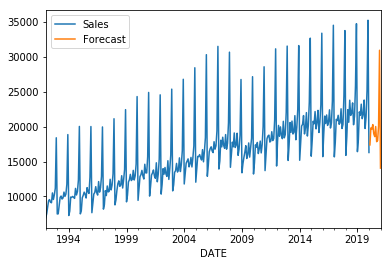

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576, 612)

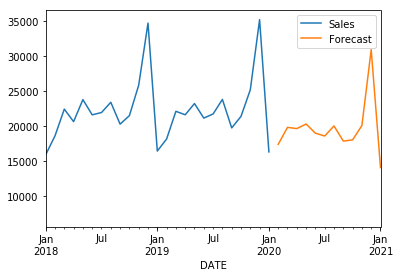

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2021-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!